Ici nous allons considérer deux champ électromagnétique dans une direction k_1 et k_2 séparé par un angle theta de l'origine.

Les conditions sont:
-l'écran est dans le plan xy
-k_1 et k_2 sont dans le plan xz
-la fréquence angulaire des deux ondes sont pareilles (w = w_1 = w_2)

Le but de ce travail est de:
a) trouver l'expression mathématique de l'intensité I(x, y, z=0)
b) l'expression de la période T
c) L'angle pour avoir une period de 1ms avec un laser HeNe

In [66]:
import sympy as smp
from IPython.display import display, Math
from sympy.vector import CoordSys3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [67]:
C = CoordSys3D('C')
x = smp.symbols('x', real=True)
y = smp.symbols('y', real=True)
z = smp.symbols('z', real=True)
frequence = smp.symbols(r'\omega', real = True)
k = smp.symbols('k', real=True)
k_1 = smp.symbols('k_1', real=True)
k_2 = smp.symbols('k_2', real=True)
k_1_x = smp.symbols('k_{1x}', real=True)
k_1_y = smp.symbols('k_{1y}', real=True)
k_1_z = smp.symbols('k_{1z}', real=True)
k_2_x = smp.symbols('k_{2x}', real=True)
k_2_y = smp.symbols('k_{2y}', real=True)
k_2_z = smp.symbols('k_{2z}', real=True)
angle = smp.symbols(r'\theta', real=True)
E_1 = smp.symbols('E_1')
E_2 = smp.symbols('E_2')
r = smp.symbols(r'\vec{r}', real=True)
E_0 = smp.symbols(r'\vec{E_0}', real = True)
E = smp.symbols(r'\vec{E}')
E_c = smp.symbols(r'\vec{E^*}')#x*k*smp.sin(angle)
t = smp.symbols('t', real=True)
epsi = smp.symbols(r'\epsilon_0', real=True)
mu = smp.symbols(r'\mu', real=True)
c = smp.symbols(r'c', real=True, positive=True, nonzero=True)

Écrivon les deux champs E_1 et E_1

In [68]:
E_1 = E_0*smp.exp(smp.I*(-k_1*r))*smp.exp(smp.I*frequence*t)
E_2 = E_0*smp.exp(smp.I*(-k_2*r))*smp.exp(smp.I*frequence*t)
display(Math(r'\vec{E_1} = '+smp.latex(E_1)))
display(Math(r'\vec{E_2} = '+smp.latex(E_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [69]:
#Champ total
E = E_1 + E_2
display(Math(r'\vec{E} = '+smp.latex(E)))

<IPython.core.display.Math object>

In [70]:
#conjugé
E_c = smp.conjugate(E)
display(Math(r'\vec{E^*} = '+smp.latex(E_c)))

<IPython.core.display.Math object>

Trouvons l'expression mathématique de l'intensité

In [71]:
I_1 = E_1*smp.conjugate(E_1)
display(Math(r'I_1 = '+smp.latex(I_1)))

<IPython.core.display.Math object>

In [72]:
I_2 = E_2*smp.conjugate(E_2)
display(Math(r'I_2 = '+smp.latex(I_2)))

<IPython.core.display.Math object>

In [73]:
I_1c_2 = smp.re((smp.conjugate(E_1)*E_2).subs(k_1, x*k*smp.sin(angle)).subs(k_2, -x*k*smp.sin(angle)).subs(r, 1).rewrite(smp.sin))
I_1_2c = smp.re((E_1*smp.conjugate(E_2)).subs(k_1, x*k*smp.sin(angle)).subs(k_2, -x*k*smp.sin(angle)).subs(r, 1).rewrite(smp.sin))
display(Math(r'I_1c = '+smp.latex(I_1c_2)))
display(Math(r'I_2c = '+smp.latex(I_1_2c)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [74]:
I = ((I_1 + I_2 + I_1_2c + I_1c_2)/(2*mu*c)).simplify()
display(Math('I = '+smp.latex(I)))

<IPython.core.display.Math object>

Trouvons l'expression mathématique pour la séparation entre les franges

In [75]:
n = smp.symbols('n', integer=True, real=True)
eq10 = smp.Eq(k*x*smp.sin(angle), smp.pi/2 + n*smp.pi)
display(Math(smp.latex(eq10)))

<IPython.core.display.Math object>

In [76]:
x_1 = smp.symbols('x_1', real=True)
x_2 = smp.symbols('x_2', real=True)
eq11 = eq10.subs(x, x_1)
eq12 = eq10.subs(x, x_2).subs(n, n+1)

display(Math(smp.latex(eq11)))
display(Math(smp.latex(eq12)))

eq13 = smp.solve((eq11, eq12), (x_1, x_2))
display(Math(smp.latex(eq13)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [77]:
wavelength = smp.symbols(r'\lambda')
eq14 = eq13[x_1]
eq15 = eq13[x_2]
eq16 = (eq15 - eq14).simplify()
display(Math(r'\Delta x = '+smp.latex(eq16)))
display(Math('= '+smp.latex(eq16.subs(smp.pi/k, wavelength/2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Trouvons l'angle qui donne une séparation de 1mm pour un laser d'HeNe

In [78]:
amplitude = 1
lambda_HeNe = 633e-9 #angstrom
k = (2*np.pi)/lambda_HeNe
mu = 1
c = 1
MIN = -0.5
MAX = 0.5
N = 100
SEP = 0.001  #mm
angle_sep = (180/np.pi)*np.arcsin(lambda_HeNe/(2*SEP))
print("L'angle de séparation est: ", angle_sep)

L'angle de séparation est:  0.018134114518646407


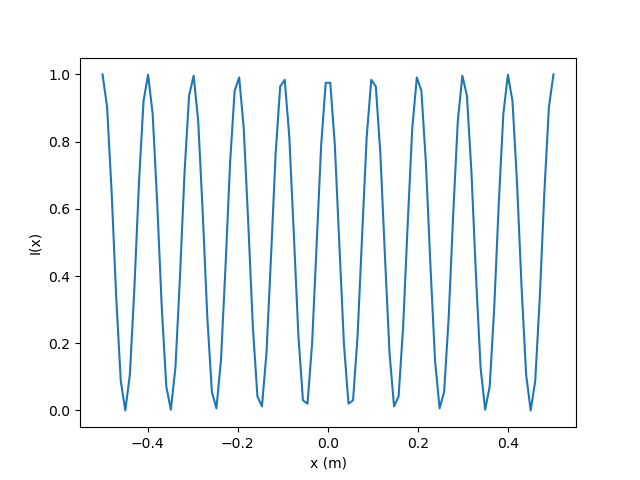

In [79]:
def I(d):
    return ((amplitude**2)*(np.cos(2*k*d*np.sin(angle_sep*(np.pi/180)))+1))/(2*mu*c)
distance = np.linspace(MIN, MAX, N)
plt.plot(distance, I(distance))
plt.xlabel('x (m)')
plt.ylabel('I(x)')
plt.show()

In [80]:
phi_1 = smp.symbols(r'\phi_1', real=True)
phi_2 = smp.symbols(r'\phi_2', real=True)
E_1 = E_0*smp.exp(smp.I*(-k_1*r + phi_1))*smp.exp(smp.I*frequence*t)
E_2 = E_0*smp.exp(smp.I*(-k_2*r + phi_2))*smp.exp(smp.I*frequence*t)
display(Math(r'\vec{E_1} = '+smp.latex(E_1)))
display(Math(r'\vec{E_2} = '+smp.latex(E_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [81]:
#Champ total
E = E_1 + E_2
display(Math(r'\vec{E} = '+smp.latex(E)))

<IPython.core.display.Math object>

In [82]:
#conjugé
E_c = smp.conjugate(E)
display(Math(r'\vec{E^*} = '+smp.latex(E_c)))

<IPython.core.display.Math object>

In [83]:
I_1 = E_1*smp.conjugate(E_1)
display(Math(r'I_1 = '+smp.latex(I_1)))

<IPython.core.display.Math object>

In [84]:
I_2 = E_2*smp.conjugate(E_2)
display(Math(r'I_2 = '+smp.latex(I_2)))

<IPython.core.display.Math object>

In [85]:
k = smp.symbols('k', real=True)
I_1c_2 = smp.re((smp.conjugate(E_1)*E_2).subs(k_1, x*k*smp.sin(angle)).subs(k_2, -x*k*smp.sin(angle)).subs(r, 1).rewrite(smp.sin))
I_1_2c = smp.re((E_1*smp.conjugate(E_2)).subs(k_1, x*k*smp.sin(angle)).subs(k_2, -x*k*smp.sin(angle)).subs(r, 1).rewrite(smp.sin))
display(Math(r'I_1c = '+smp.latex(I_1c_2)))
display(Math(r'I_2c = '+smp.latex(I_1_2c)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [86]:
I = ((I_1 + I_2 + I_1_2c + I_1c_2)/(2*mu*c)).simplify()
display(Math('I = '+smp.latex(I)))

<IPython.core.display.Math object>

In [87]:
k = (2*np.pi)/lambda_HeNe
phi = np.pi/2
angle_sep = (180/np.pi)*np.arcsin(lambda_HeNe/(2*SEP))
print("L'angle de séparation est: ", angle_sep)

L'angle de séparation est:  0.018134114518646407


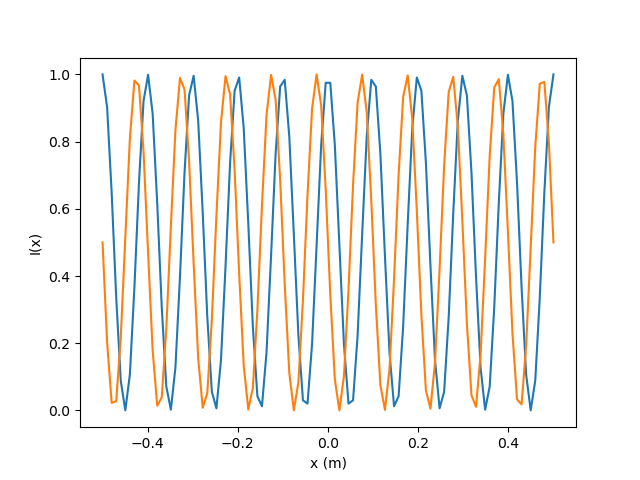

In [88]:
def I(d):
    return ((amplitude**2)*(np.cos(2*k*d*np.sin(angle_sep*(np.pi/180)) + phi)+1))/(2*mu*c)
distance = np.linspace(MIN, MAX, N)
plt.plot(distance, I(distance))
plt.xlabel('x (m)')
plt.ylabel('I(x)')
plt.show()